In [10]:
"""
A notebook implementing feature visualizing in distill.pub.
The goal is to reveal which facet of the classes have been learning by the 
network.
We try to optimize the input that maximally stimulate a certain neuron / layer.
The key element is the optimization objectives (layer, neuron, class, etc.).
"""
!pip install git+https://github.com/raghakot/keras-vis.git --upgrade --quiet
!pip install keract --quiet
from keract import get_activations, display_activations
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from vis.visualization import visualize_activation
from vis.utils import utils


(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

model = keras.Sequential()


model.add(keras.layers.Conv2D(32, 3, input_shape=(28,28,1), padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [0]:
history = model.fit(x_train, y_train, epochs=20,
                    verbose=1, validation_split=0.1)

Test loss: 0.4048916456602514
Test accuracy: 0.9254


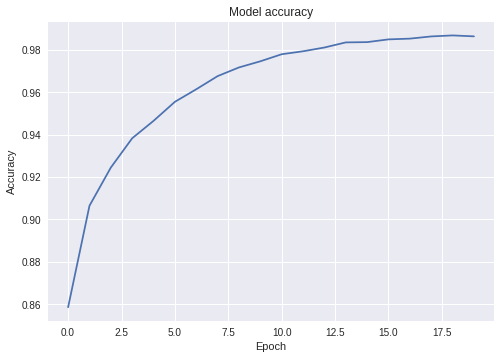

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

dims of the top weights (3, 3, 1, 32)


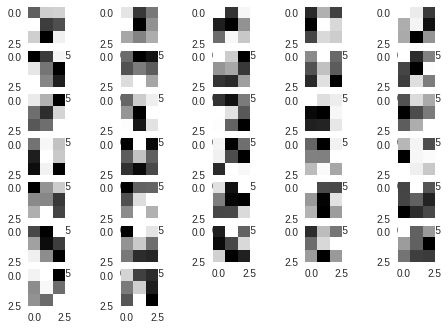

In [13]:
# showing top layer filters
top_layer = model.layers[0]
top_weights = top_layer.get_weights()[0]
print("dims of the top weights", top_weights.shape)

for i in range(top_weights.shape[3]):
    plt.subplot(7,5,i+1)
    plt.imshow(top_weights[:,:,:,i].squeeze())
    plt.grid('False')

In [0]:
from keract import get_activations, display_activations

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    print(x_test[0].shape)
    out = activations = get_activations(model, np.expand_dims(x_test[0],0))
    display_activations(out)
# print(img.shape)

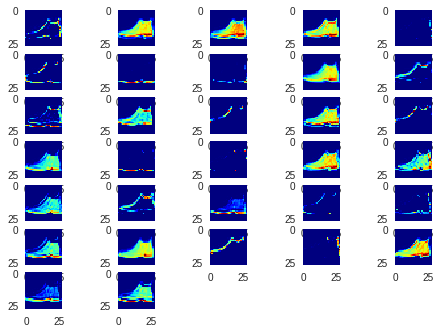

In [33]:
for i in range(out['conv2d_2/Relu:0'].shape[3]):
    plt.subplot(7,5,i+1)
    plt.imshow(out['conv2d_2/Relu:0'][:,:,:,i].squeeze(), cmap=plt.cm.jet)
    plt.grid('False')

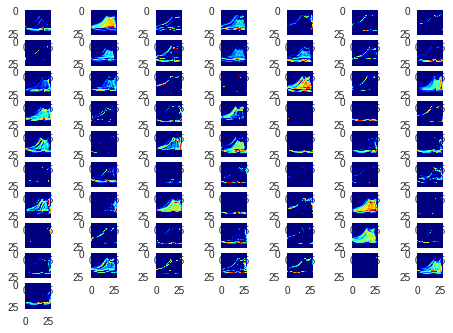

In [32]:
for i in range(out['conv2d_3/Relu:0'].shape[3]):
    plt.subplot(10,7,i+1)
    plt.imshow(out['conv2d_3/Relu:0'][:,:,:,i].squeeze(), cmap=plt.cm.jet)
    plt.grid('False')

Displaying activation map 0


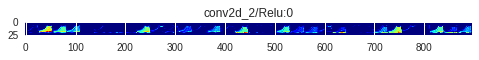

Displaying activation map 1


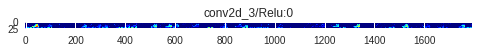

Displaying activation map 2


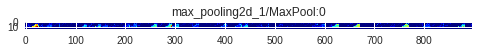

Displaying activation map 3


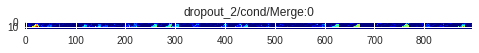

Displaying activation map 4


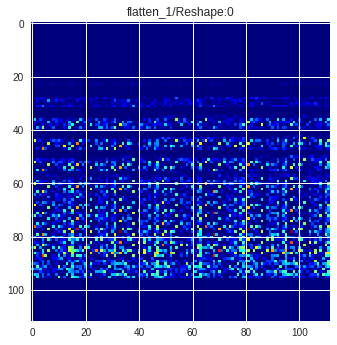

Displaying activation map 5


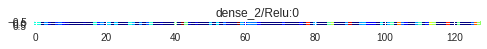

Displaying activation map 6


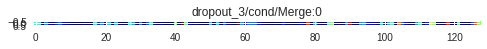

Displaying activation map 7


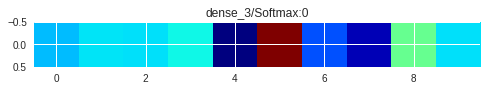

dict_keys(['conv2d_2/Relu:0', 'conv2d_3/Relu:0', 'max_pooling2d_1/MaxPool:0', 'dropout_2/cond/Merge:0', 'flatten_1/Reshape:0', 'dense_2/Relu:0', 'dropout_3/cond/Merge:0', 'dense_3/Softmax:0'])
[[0.09965806 0.10003997 0.10001678 0.10025183 0.09655102 0.1065619
  0.09860743 0.09702124 0.10128829 0.1000035 ]]
[[3.1188550e-16 3.3069712e-24 1.1896774e-17 2.2455342e-25 6.7305181e-27
  1.4982544e-15 1.5539803e-21 3.8040935e-13 1.4629895e-22 1.0000000e+00]]


In [38]:
display_activations(out)
print(out.keys())
print(out['dense_3/Softmax:0'])
print(model.predict(np.expand_dims(x_test[0],0)))